In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [56]:
data = pd.read_csv("california_housing_train.csv")

# Создание синтетического признака "количество комнат на домохозяйство"
# data['rooms_per_household'] = data['total_rooms'] / data['households']

data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

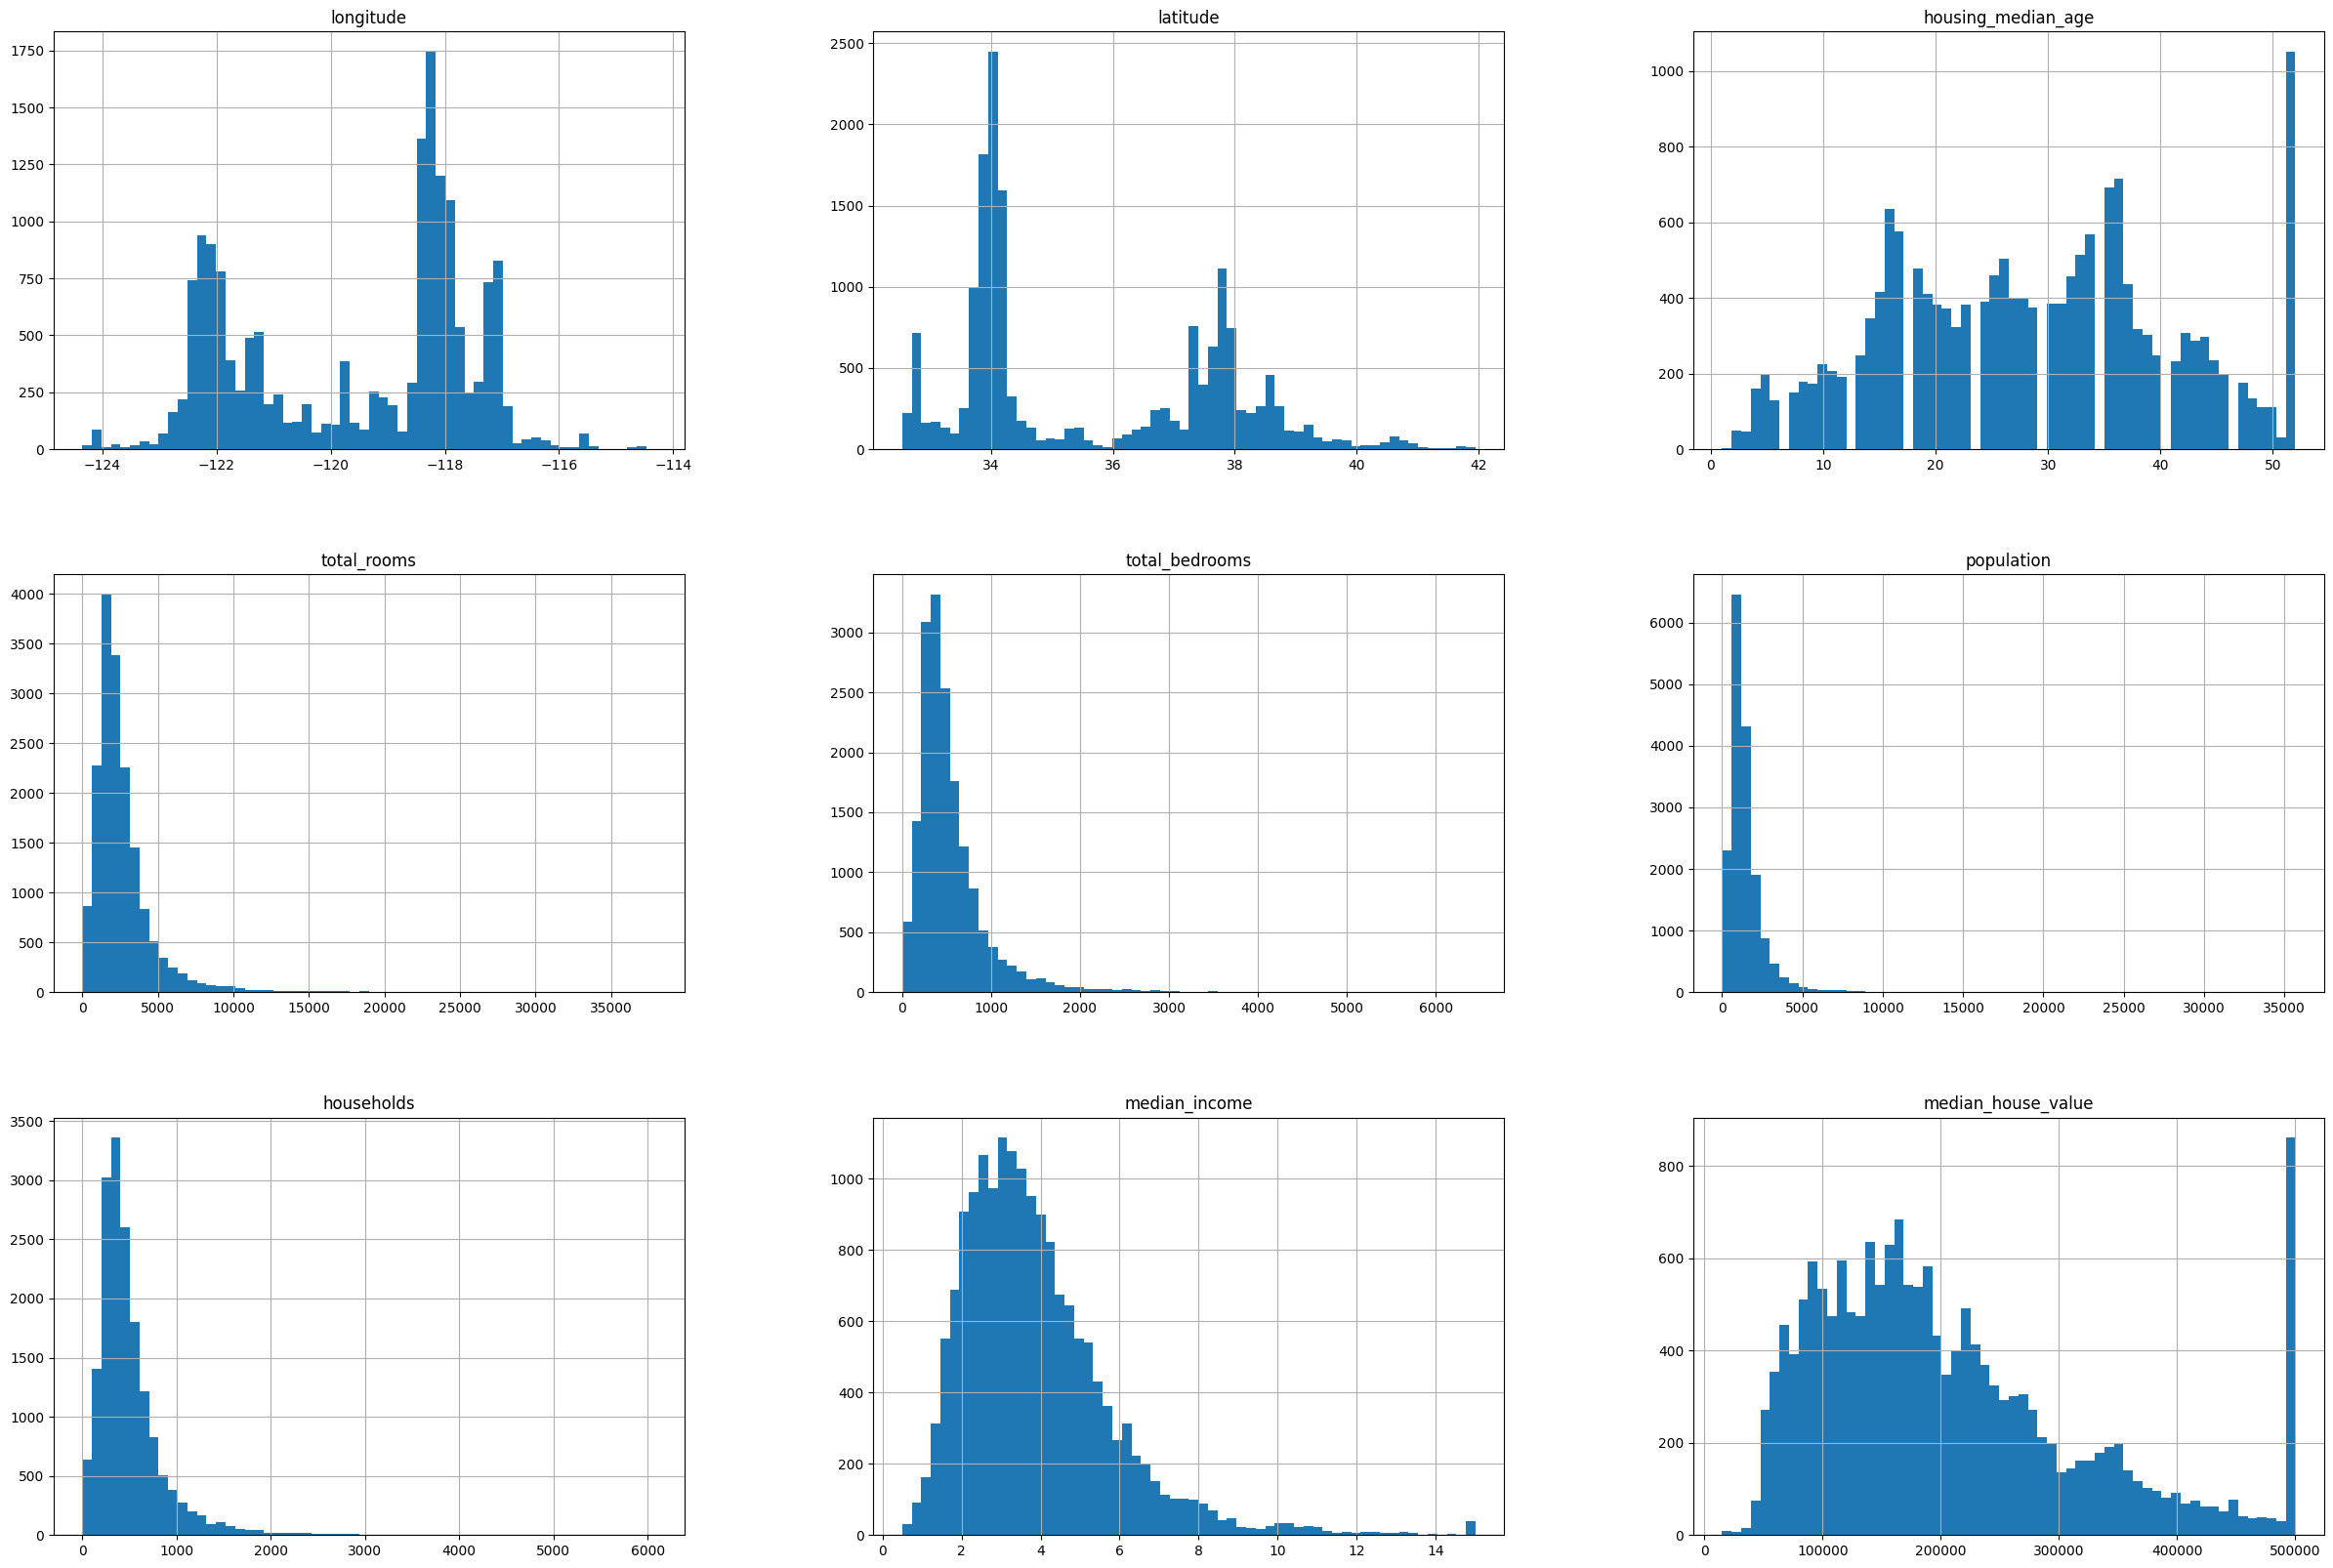

In [57]:
statistics = data.describe()

# means = statistics.loc["mean"]
# std_devs = statistics.loc["std"]
# 
# plt.figure(figsize=(12, 6))
# means.plot(kind="bar", yerr=std_devs, capsize=4, color="skyblue")
# plt.title("Среднее значение и стандартное отклонение для каждого признака")
# plt.xlabel("Признак")
# plt.ylabel("Значение")
# plt.xticks(rotation=45)
# plt.show()

data.hist(bins=60, figsize=(30, 20))


In [58]:
missing_values = data.isnull()
print(missing_values)

data.dropna(inplace=True)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
16995      False     False               False        False           False   
16996      False     False               False        False           False   
16997      False     False               False        False           False   
16998      False     False               False        False           False   
16999      False     False               False        False           False   

       population  households  median_income  media

In [59]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[ 2.619365  , -0.67152023, -1.07967114, ..., -0.07599796,
        -1.25254316, -1.21055773],
       [ 2.53956878, -0.57326437, -0.76187201, ..., -0.09940441,
        -1.08148298, -1.09674535],
       [ 2.4946834 , -0.90546278, -0.92077158, ..., -0.99925206,
        -1.17010515, -1.04846131],
       ...,
       [-2.36291168,  2.90780067, -0.92077158, ..., -0.11760942,
        -0.44666313, -0.89412482],
       [-2.36291168,  2.88908527, -0.76187201, ..., -0.06039367,
        -0.99778717, -1.04759909],
       [-2.387848  ,  2.29955006,  1.85997083, ..., -0.60134255,
        -0.45536288, -0.97172417]])

0.9809200924180902


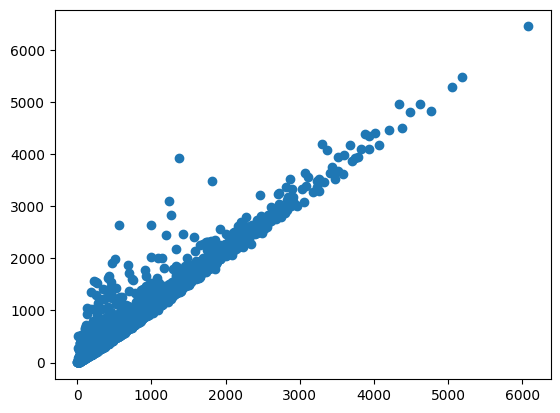

In [60]:
plt.scatter(data['households'], data['total_bedrooms'])
print(data.corr()['households']['total_bedrooms'])
# data.drop('total_bedrooms', axis=1, inplace=True)

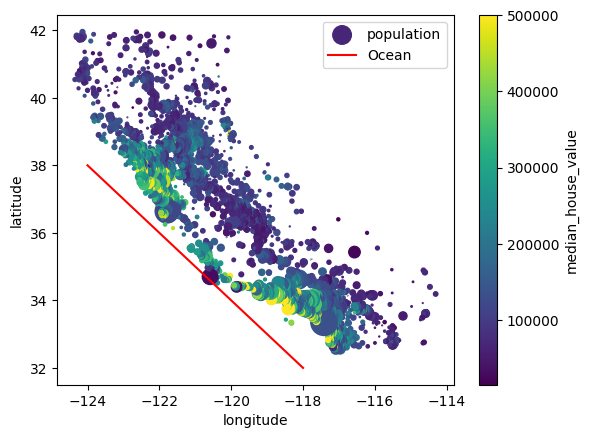

In [61]:
data.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    s=data.population/100,
    label="population",
    c="median_house_value",
    colorbar=True
)

plt.plot([-124, -118], [38, 32], c='red', label='Ocean')
plt.legend()

In [62]:
data_scaled = data.copy()

columns_to_scale = [col for col in data.columns if col != 'median_house_value']

#Scaling all selected columns
data_scaled[columns_to_scale] = scaler.fit_transform(data_scaled[columns_to_scale])

data_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543,66900.0
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483,80100.0
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105,85700.0
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600,73400.0
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454,65500.0


In [63]:
from sklearn.model_selection import train_test_split

# Разделение данных на признаки (X) и целевую переменную (y)
X = data_scaled.drop(columns=['median_house_value'])
y = data_scaled['median_house_value']

# Разделение данных на обучающий и тестовый наборы (80% обучение, 20% тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13600, 8), (3400, 8), (13600,), (3400,))

In [64]:
# Добавление столбца единиц к матрице признаков для учета свободного коэффициента
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train.values]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test.values]


def least_squares(X, y):
    X_transpose = X.T
    X_transpose_X = X_transpose @ X
    X_transpose_X_inv = np.linalg.inv(X_transpose_X)
    X_transpose_y = X_transpose @ y
    beta_hat = X_transpose_X_inv @ X_transpose_y
    return beta_hat


beta_hat = least_squares(X_train_bias, y_train)
y_pred = X_test_bias @ beta_hat

beta_hat
# y_pred


array([206937.57380681, -87152.49117443, -92130.11005474,  14244.52450156,
       -19277.27309583,  47926.43878364, -40927.87739064,  17359.66519312,
        76695.57323127])

In [65]:
# Наборы признаков для трех моделей
features_sets = {
    "Geographical": ["longitude", "latitude"],
    "House Information": ["housing_median_age", "total_rooms", "total_bedrooms", "households"],
    "Demographic & Income": ["population", "households", "median_income"]
}

# Словарь для хранения коэффициентов каждой модели
beta_hats = {}

# Обучение моделей для каждого набора признаков
for model_name, features in features_sets.items():
    # Выбор признаков из обучающего набора
    X_train_subset = X_train[features]
    X_train_bias_subset = np.c_[np.ones(X_train_subset.shape[0]), X_train_subset.values]
    
    beta_hat_subset = least_squares(X_train_bias_subset, y_train)
    beta_hats[model_name] = beta_hat_subset
    
beta_hats
    

{'Geographical': array([ 206582.20554581, -144301.52903695, -150212.61950601]),
 'House Information': array([206794.33791957,  20953.23719415,  81474.96306419, -88173.08453472,
         25254.85092064]),
 'Demographic & Income': array([207187.65314272, -48916.8512821 ,  51366.80165332,  79106.14023931])}

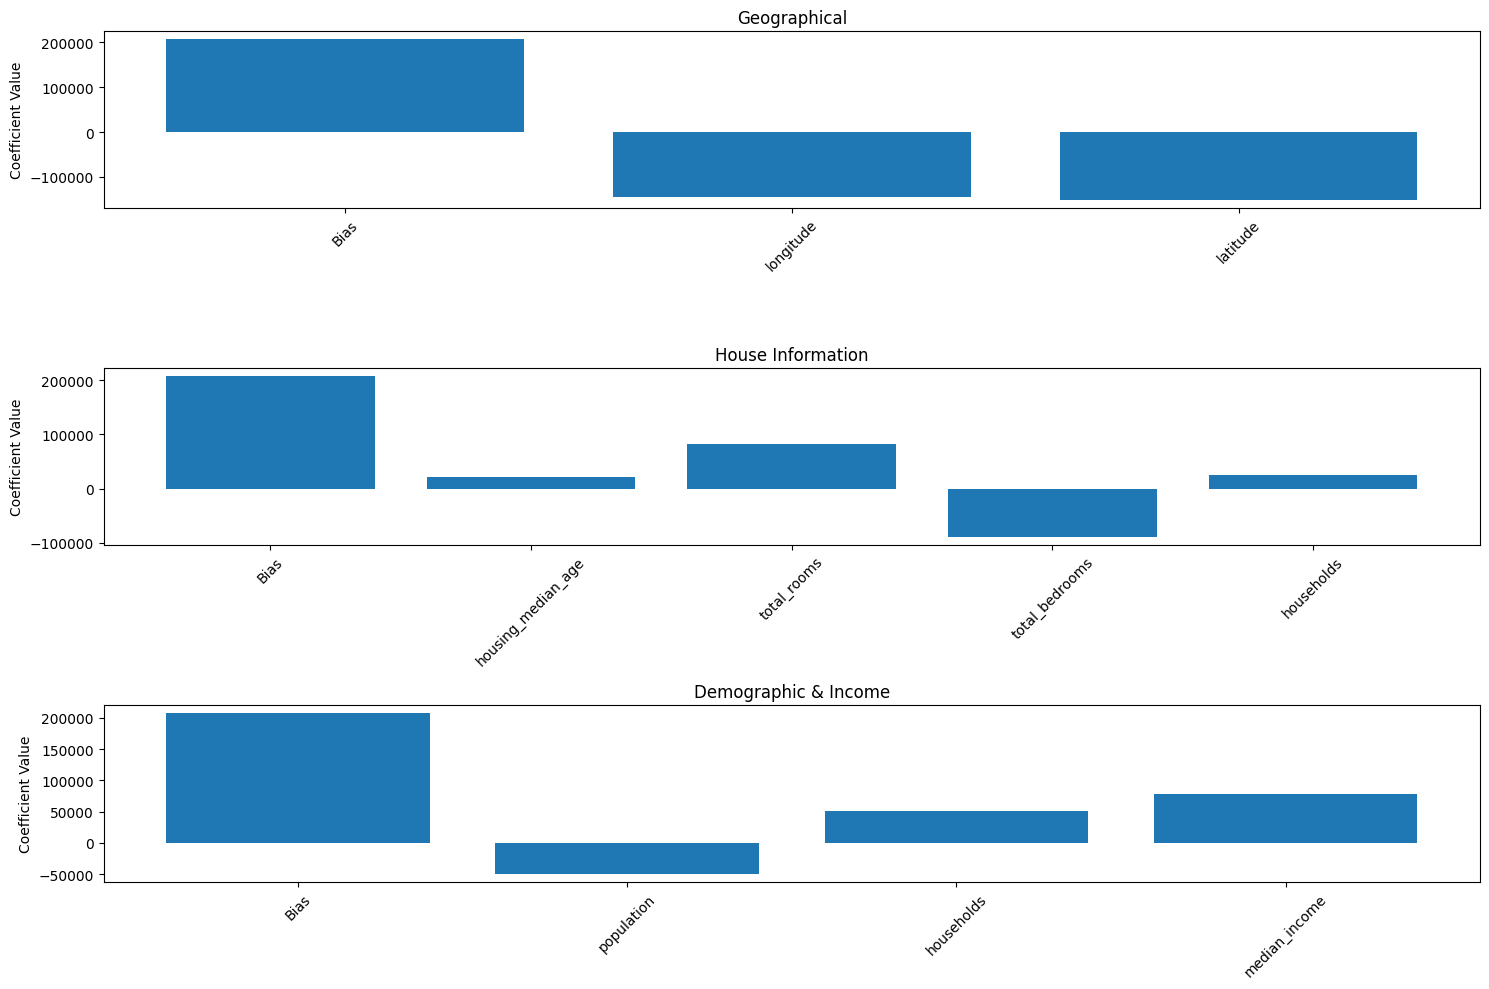

In [66]:
# Visualization of the coefficients for each model
plt.figure(figsize=(15, 10))

for index, (model_name, coefficients) in enumerate(beta_hats.items(), 1):
    plt.subplot(3, 1, index)

    # Including "Bias" for the bias term in the x-axis labels
    feature_names = ["Bias"] + features_sets[model_name]
    plt.bar(feature_names, coefficients)

    plt.title(model_name)
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [67]:
def r_squared(y_true, y_pred):
    """Рассчитать коэффициент детерминации R^2"""
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


# Словарь для хранения коэффициента детерминации каждой модели
r2_scores = {}

# Вычисление R^2 для каждой модели
for model_name, features in features_sets.items():
    # Выбор признаков из тестового набора
    X_test_subset = X_test[features]
    X_test_bias_subset = np.c_[np.ones(X_test_subset.shape[0]), X_test_subset.values]

    # Прогнозирование с использованием модели
    y_pred = X_test_bias_subset @ beta_hats[model_name]

    # Вычисление R^2 для текущей модели
    r2_scores[model_name] = r_squared(y_test.values, y_pred)

r2_scores


{'Geographical': 0.24233493503265857,
 'House Information': 0.09897882542237124,
 'Demographic & Income': 0.5426621238013973}

<h2>Географическая модель (признаки: longitude и latitude):</h2>

R^2=0.2423
Эта модель объясняет примерно 24.2% дисперсии зависимой переменной. Для модели, основанной только на географической информации, это неплохой результат. Это указывает на то, что местоположение имеет некоторое значение при предсказании стоимости дома, но это далеко не единственный важный фактор.

<h2>Модель информации о доме (признаки: housing_median_age, total_rooms, total_bedrooms, и households):</h2>

R^2=0.099
Этот результат говорит о том, что информация о доме объясняет только 9.9% дисперсии зависимой переменной. Это может указывать на то, что хотя характеристики дома влияют на стоимость, в этом датасете они не являются ключевыми факторами.

<h2>Демографическая и доходная модель (признаки: population, households, и median_income):</h2>
R^2=0.5427
Эта модель значительно превосходит другие, объясняя 54.3% дисперсии зависимой переменной. Это указывает на то, что демографические факторы и медианный доход населения являются ключевыми факторами, влияющими на стоимость дома в этом датасете.
